# Dry Beans Classification

- Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.

- In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending **ONLY** on dimension and shape features of bean varieties with no external discriminatory features.

### Data fields

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

## Install required packages

In [3]:
#pip install imbalanced-learn
#pip install featurewiz

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from plotnine import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from lightgbm import *
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

## Reading the dataset

In [3]:
df = pd.read_csv('dataset/train_dry.csv',index_col='ID')

In [4]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI


- There are 10834 rows and and a total of 16 features.

In [5]:
df['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

- There are 7 unique target classes 

### Get Data Summary

In [6]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,200705.420000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1716.551280,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,653.014248,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,400.636925,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.248644,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.895673,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,203320.565000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,505.515655,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.830903,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.993309,0.994677


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

- No missing values in the training dataset but we have to take into consideration if any missing data may appear in the test set.

### Checking for duplicates

In [8]:
df.duplicated(subset=None, keep='first').sum()

0

- No duplicate records

## EDA

**1- Count and distribution of all beans categories:**

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64


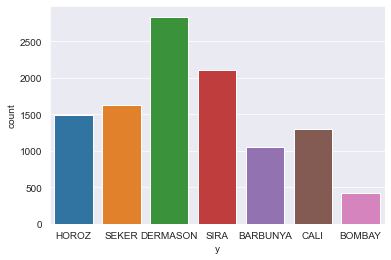

In [9]:
print(df['y'].value_counts())
_ = sns.countplot(x='y', data=df)

- We can notice that there is a slight imbalance in the data we need to handle.

**2- Distribution of numerical features:**

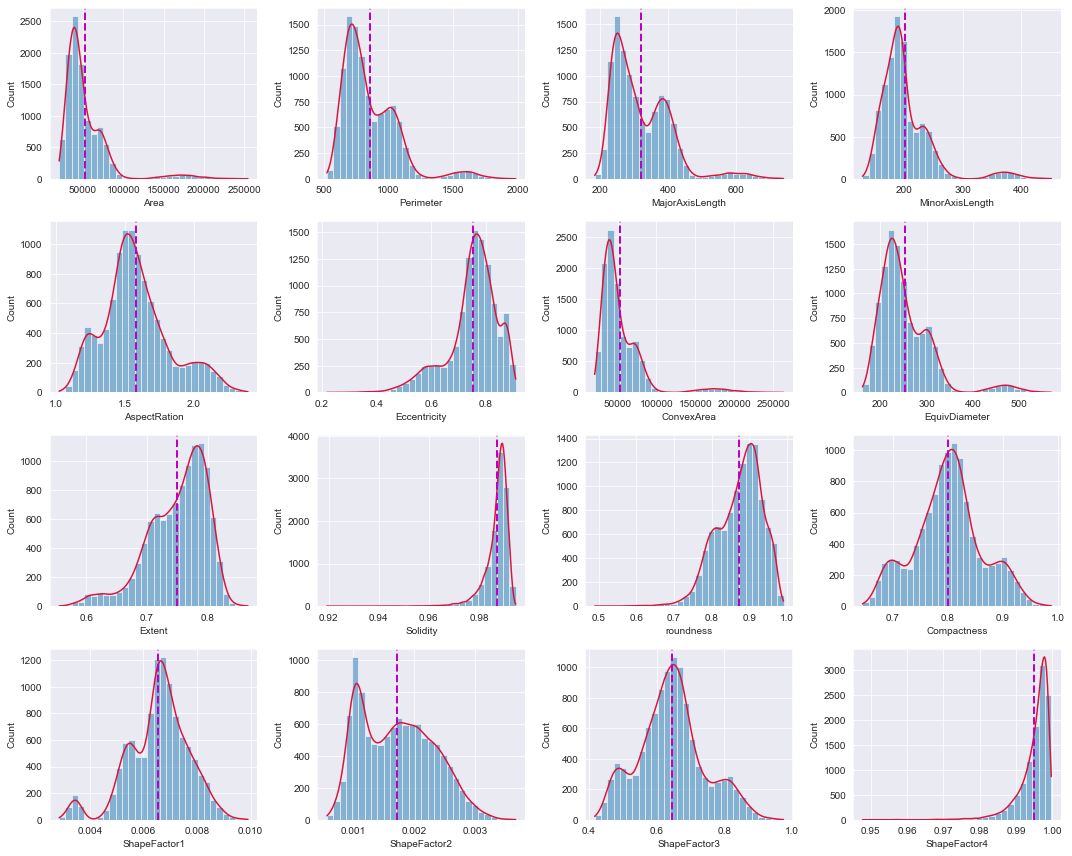

In [10]:
Numeric_cols = df.drop(columns=['y']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

- Some distributions have long tails and most are **bi-modal** which means that some bean classes should be quite distinct from others. 

**3- Boxplot of numerical features for each type of bean:**

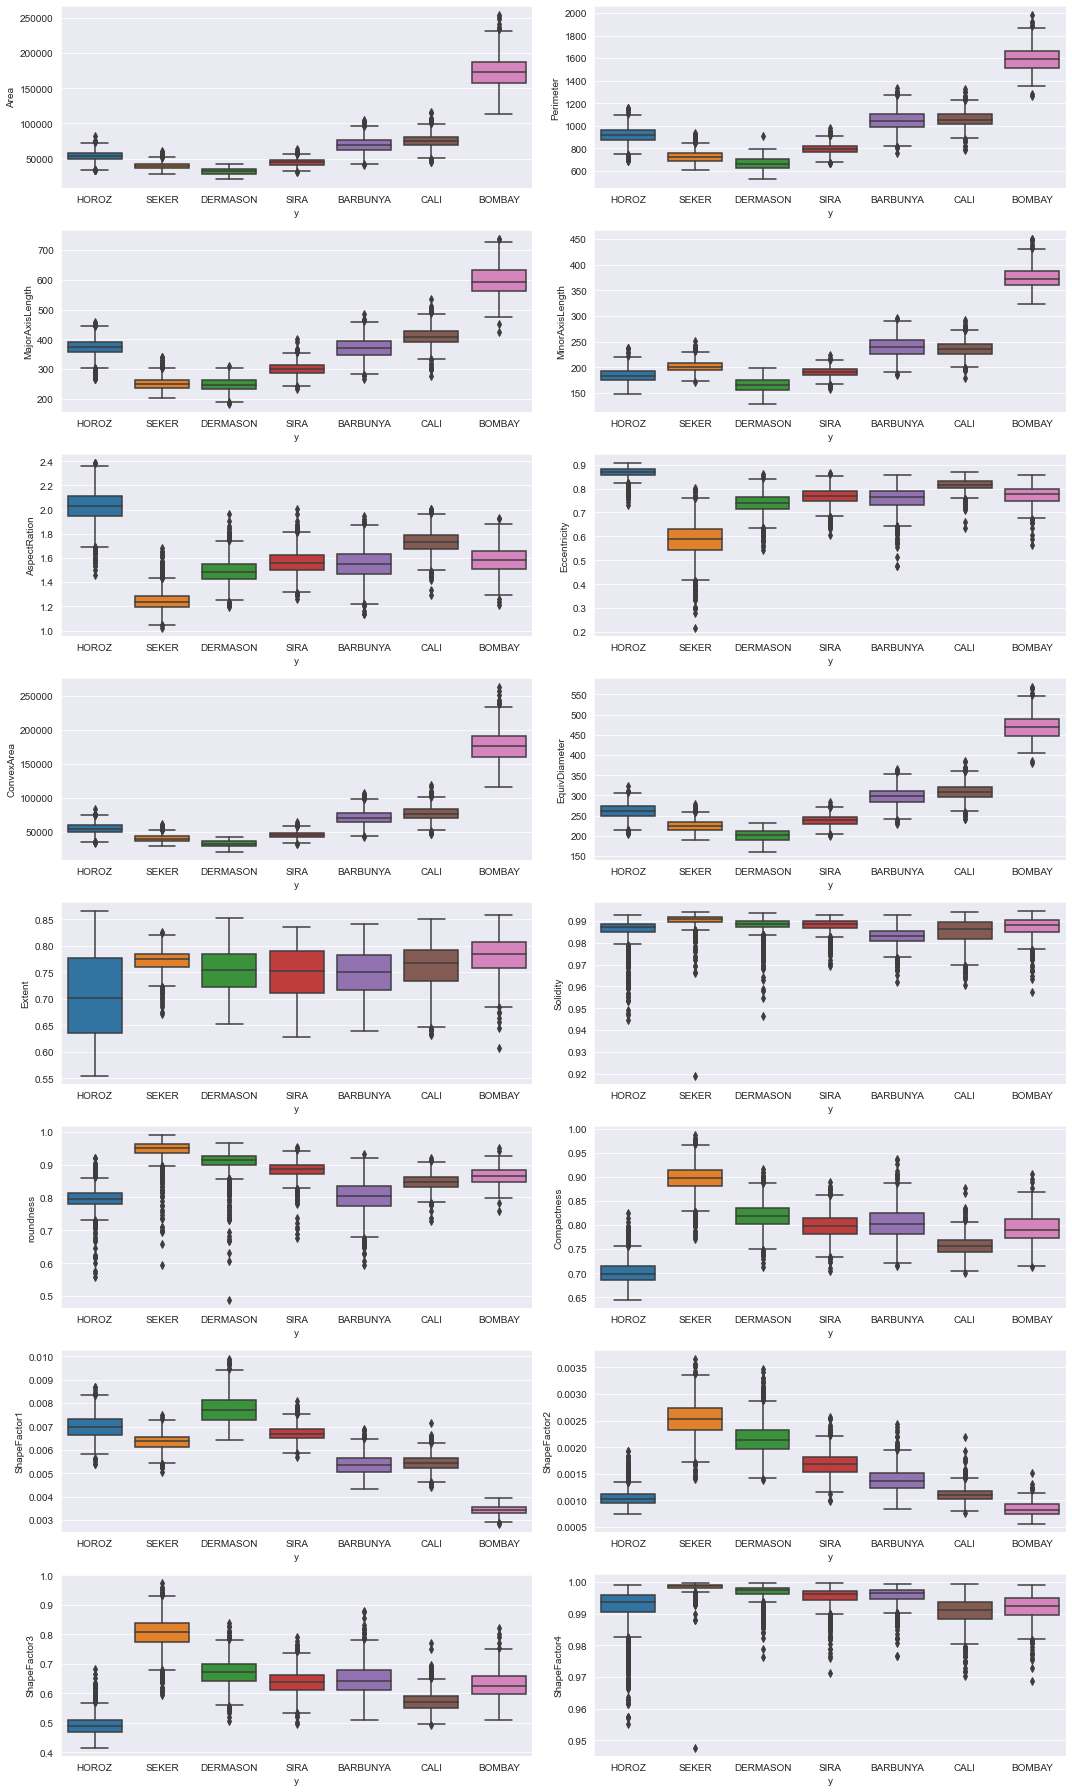

In [11]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['y'], y= df[variable], ax=subplot)
plt.tight_layout()

- We can notice that the "Bombay" & "Horoz" classes are distinct from other classes.

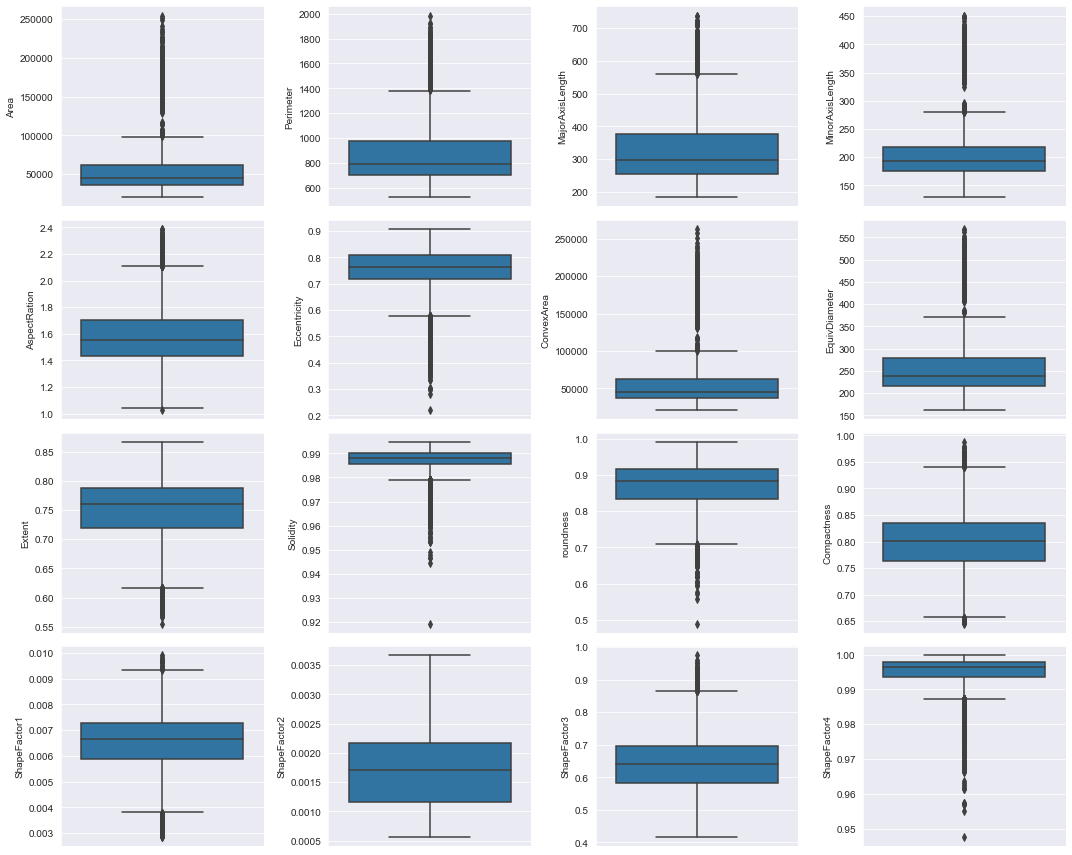

In [12]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

**4- Pearson linear correlation**

<AxesSubplot:>

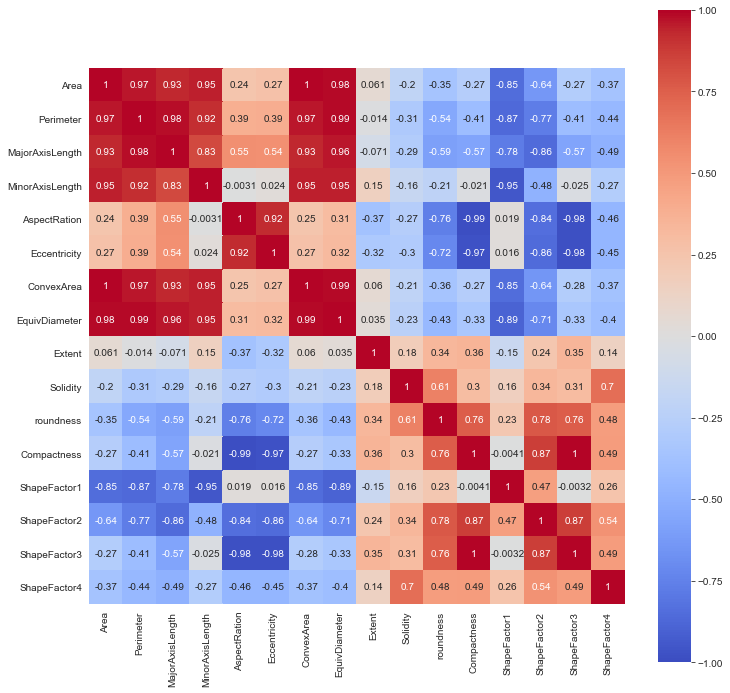

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

- There are lots of highly correlated features and to examine this multicollinearity more, we will look at the pairwise scatter plots.

**5 - Variables Scatter Pairplots**

## Adding new features

In [14]:
df['Bounding_rectangular_area'] = df['Area']/df['Extent']

## Label Encoding target column 

In [15]:
le = preprocessing.LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [16]:
df['y'].unique()

array([4, 5, 3, 6, 0, 2, 1])

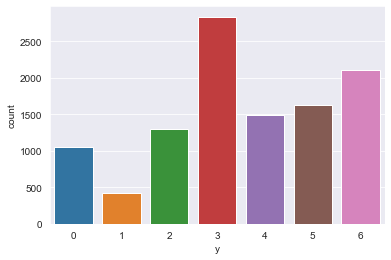

In [17]:
_ = sns.countplot(x='y', data=df)

## Train Validation split
- We are going to split the data into train and validation sets prior to any normalization or feature scaling, work with the train-splitted set separately and then apply its normalization parameters on the validation and test sets.

In [18]:
features = df.drop(columns=['y']).columns
train_df, val_df = train_test_split(df, test_size=0.05, random_state=42, stratify = df['y'])

- **Removing Outliers in some features in the training set within certain threshold**

In [19]:
train_df = train_df[train_df['Eccentricity'] >= 0.25]
train_df = train_df[train_df['Solidity'] >= 0.94]
train_df = train_df[train_df['roundness'] >= 0.53]
train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [20]:
X_train = train_df[features]
y_train = train_df['y']

X_val = val_df[features]
y_val = val_df['y']

## Feature Scaling

In [21]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','roundness','AspectRation','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity','Bounding_rectangular_area']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

In [22]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation'])
X_val = X_val.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])

Train F1_Score:  0.9421431349669389
Val F1_Score:  0.9391143911439115


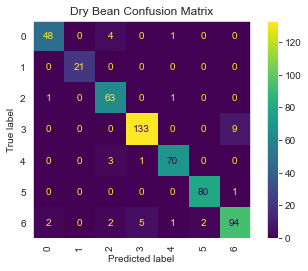

In [23]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)

model_mlp.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_mlp.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_mlp.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9594515752625438
Val F1_Score:  0.9372693726937269


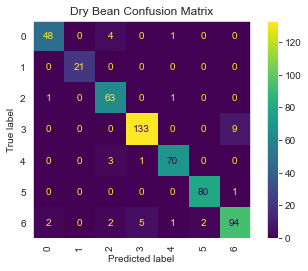

In [25]:
model_xgb= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=2,
                             max_depth=4, learning_rate=0.15, gamma=0.22, colsample_bytree=0.5)

model_xgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_xgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_xgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

0:	learn: 1.5747513	total: 172ms	remaining: 1m 43s
1:	learn: 1.3354895	total: 188ms	remaining: 56.2s
2:	learn: 1.1746783	total: 204ms	remaining: 40.6s
3:	learn: 1.0444295	total: 220ms	remaining: 32.8s
4:	learn: 0.9482163	total: 235ms	remaining: 27.9s
5:	learn: 0.8681159	total: 251ms	remaining: 24.8s
6:	learn: 0.7948639	total: 267ms	remaining: 22.6s
7:	learn: 0.7325627	total: 283ms	remaining: 20.9s
8:	learn: 0.6791659	total: 298ms	remaining: 19.6s
9:	learn: 0.6351819	total: 315ms	remaining: 18.6s
10:	learn: 0.5952145	total: 331ms	remaining: 17.7s
11:	learn: 0.5609732	total: 347ms	remaining: 17s
12:	learn: 0.5314357	total: 362ms	remaining: 16.4s
13:	learn: 0.5052377	total: 379ms	remaining: 15.9s
14:	learn: 0.4810385	total: 398ms	remaining: 15.5s
15:	learn: 0.4587019	total: 413ms	remaining: 15.1s
16:	learn: 0.4393688	total: 427ms	remaining: 14.7s
17:	learn: 0.4214110	total: 442ms	remaining: 14.3s
18:	learn: 0.4055666	total: 456ms	remaining: 14s
19:	learn: 0.3914296	total: 471ms	remaining:

170:	learn: 0.1637064	total: 2.84s	remaining: 7.12s
171:	learn: 0.1634375	total: 2.85s	remaining: 7.1s
172:	learn: 0.1631063	total: 2.87s	remaining: 7.08s
173:	learn: 0.1627208	total: 2.88s	remaining: 7.06s
174:	learn: 0.1624254	total: 2.9s	remaining: 7.04s
175:	learn: 0.1621218	total: 2.91s	remaining: 7.02s
176:	learn: 0.1619257	total: 2.93s	remaining: 7s
177:	learn: 0.1617519	total: 2.94s	remaining: 6.97s
178:	learn: 0.1615023	total: 2.96s	remaining: 6.95s
179:	learn: 0.1613203	total: 2.97s	remaining: 6.93s
180:	learn: 0.1610878	total: 2.99s	remaining: 6.91s
181:	learn: 0.1608619	total: 3s	remaining: 6.89s
182:	learn: 0.1606348	total: 3.02s	remaining: 6.87s
183:	learn: 0.1604575	total: 3.03s	remaining: 6.85s
184:	learn: 0.1602658	total: 3.04s	remaining: 6.83s
185:	learn: 0.1600614	total: 3.06s	remaining: 6.81s
186:	learn: 0.1598987	total: 3.08s	remaining: 6.8s
187:	learn: 0.1595925	total: 3.09s	remaining: 6.78s
188:	learn: 0.1593541	total: 3.11s	remaining: 6.76s
189:	learn: 0.1591914

335:	learn: 0.1327718	total: 5.52s	remaining: 4.34s
336:	learn: 0.1326143	total: 5.53s	remaining: 4.32s
337:	learn: 0.1324946	total: 5.55s	remaining: 4.3s
338:	learn: 0.1323205	total: 5.57s	remaining: 4.28s
339:	learn: 0.1322548	total: 5.58s	remaining: 4.27s
340:	learn: 0.1319799	total: 5.59s	remaining: 4.25s
341:	learn: 0.1318714	total: 5.61s	remaining: 4.23s
342:	learn: 0.1317532	total: 5.62s	remaining: 4.21s
343:	learn: 0.1316469	total: 5.64s	remaining: 4.2s
344:	learn: 0.1314456	total: 5.65s	remaining: 4.18s
345:	learn: 0.1312840	total: 5.67s	remaining: 4.16s
346:	learn: 0.1311781	total: 5.68s	remaining: 4.14s
347:	learn: 0.1309853	total: 5.7s	remaining: 4.13s
348:	learn: 0.1308234	total: 5.72s	remaining: 4.11s
349:	learn: 0.1307428	total: 5.74s	remaining: 4.1s
350:	learn: 0.1306017	total: 5.75s	remaining: 4.08s
351:	learn: 0.1305198	total: 5.77s	remaining: 4.07s
352:	learn: 0.1304088	total: 5.79s	remaining: 4.05s
353:	learn: 0.1301896	total: 5.81s	remaining: 4.04s
354:	learn: 0.12

505:	learn: 0.1114607	total: 8.4s	remaining: 1.56s
506:	learn: 0.1113861	total: 8.42s	remaining: 1.54s
507:	learn: 0.1112984	total: 8.43s	remaining: 1.53s
508:	learn: 0.1111994	total: 8.45s	remaining: 1.51s
509:	learn: 0.1111426	total: 8.46s	remaining: 1.49s
510:	learn: 0.1110070	total: 8.48s	remaining: 1.48s
511:	learn: 0.1109230	total: 8.49s	remaining: 1.46s
512:	learn: 0.1107927	total: 8.51s	remaining: 1.44s
513:	learn: 0.1107343	total: 8.52s	remaining: 1.43s
514:	learn: 0.1106537	total: 8.54s	remaining: 1.41s
515:	learn: 0.1105800	total: 8.56s	remaining: 1.39s
516:	learn: 0.1104666	total: 8.58s	remaining: 1.38s
517:	learn: 0.1103531	total: 8.6s	remaining: 1.36s
518:	learn: 0.1102263	total: 8.62s	remaining: 1.34s
519:	learn: 0.1101619	total: 8.64s	remaining: 1.33s
520:	learn: 0.1100866	total: 8.66s	remaining: 1.31s
521:	learn: 0.1099405	total: 8.68s	remaining: 1.3s
522:	learn: 0.1098354	total: 8.7s	remaining: 1.28s
523:	learn: 0.1097254	total: 8.71s	remaining: 1.26s
524:	learn: 0.10

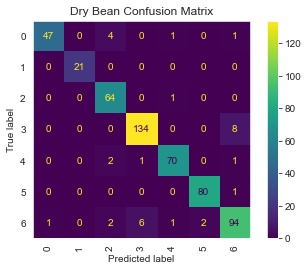

In [26]:
model_cb= cb.CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=4, iterations=600, depth= 6)

model_cb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_cb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_cb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_cb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9491443018280824
Val F1_Score:  0.940959409594096


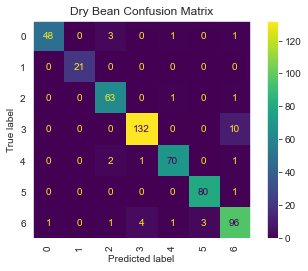

In [27]:
model_lgb = lgb.LGBMClassifier(random_state=42,silent=True,subsample=0.8, reg_lambda=0.1,reg_alpha=1, num_leaves=5, 
                             n_estimators=100, min_child_samples=5, max_depth=5, learning_rate=0.12, 
                             colsample_bytree=0.5, boosting_type='goss', metric='multi_error', num_class=7)

model_lgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_lgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_lgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9418514196810579
Val F1_Score:  0.933579335793358


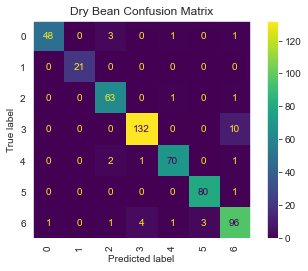

In [28]:
model_svc = SVC(probability=True, kernel='rbf', C=25)

model_svc.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

0:	learn: 1.5747513	total: 17.1ms	remaining: 10.3s
1:	learn: 1.3354895	total: 31.8ms	remaining: 9.5s
2:	learn: 1.1746783	total: 46.4ms	remaining: 9.23s
3:	learn: 1.0444295	total: 61.5ms	remaining: 9.16s
4:	learn: 0.9482163	total: 76.1ms	remaining: 9.05s
5:	learn: 0.8681159	total: 90.6ms	remaining: 8.97s
6:	learn: 0.7948639	total: 104ms	remaining: 8.85s
7:	learn: 0.7325627	total: 121ms	remaining: 8.99s
8:	learn: 0.6791659	total: 138ms	remaining: 9.05s
9:	learn: 0.6351819	total: 154ms	remaining: 9.09s
10:	learn: 0.5952145	total: 170ms	remaining: 9.12s
11:	learn: 0.5609732	total: 187ms	remaining: 9.18s
12:	learn: 0.5314357	total: 203ms	remaining: 9.16s
13:	learn: 0.5052377	total: 220ms	remaining: 9.21s
14:	learn: 0.4810385	total: 237ms	remaining: 9.24s
15:	learn: 0.4587019	total: 251ms	remaining: 9.18s
16:	learn: 0.4393688	total: 266ms	remaining: 9.12s
17:	learn: 0.4214110	total: 280ms	remaining: 9.06s
18:	learn: 0.4055666	total: 295ms	remaining: 9.01s
19:	learn: 0.3914296	total: 310ms	re

168:	learn: 0.1641990	total: 2.69s	remaining: 6.86s
169:	learn: 0.1639729	total: 2.71s	remaining: 6.85s
170:	learn: 0.1637064	total: 2.73s	remaining: 6.84s
171:	learn: 0.1634375	total: 2.74s	remaining: 6.82s
172:	learn: 0.1631063	total: 2.76s	remaining: 6.81s
173:	learn: 0.1627208	total: 2.77s	remaining: 6.79s
174:	learn: 0.1624254	total: 2.79s	remaining: 6.77s
175:	learn: 0.1621218	total: 2.8s	remaining: 6.75s
176:	learn: 0.1619257	total: 2.82s	remaining: 6.74s
177:	learn: 0.1617519	total: 2.84s	remaining: 6.72s
178:	learn: 0.1615023	total: 2.85s	remaining: 6.71s
179:	learn: 0.1613203	total: 2.87s	remaining: 6.69s
180:	learn: 0.1610878	total: 2.88s	remaining: 6.67s
181:	learn: 0.1608619	total: 2.9s	remaining: 6.65s
182:	learn: 0.1606348	total: 2.92s	remaining: 6.64s
183:	learn: 0.1604575	total: 2.93s	remaining: 6.62s
184:	learn: 0.1602658	total: 2.94s	remaining: 6.6s
185:	learn: 0.1600614	total: 2.96s	remaining: 6.59s
186:	learn: 0.1598987	total: 2.97s	remaining: 6.57s
187:	learn: 0.1

333:	learn: 0.1330226	total: 5.34s	remaining: 4.25s
334:	learn: 0.1329186	total: 5.36s	remaining: 4.24s
335:	learn: 0.1327718	total: 5.38s	remaining: 4.22s
336:	learn: 0.1326143	total: 5.39s	remaining: 4.21s
337:	learn: 0.1324946	total: 5.41s	remaining: 4.19s
338:	learn: 0.1323205	total: 5.42s	remaining: 4.17s
339:	learn: 0.1322548	total: 5.43s	remaining: 4.16s
340:	learn: 0.1319799	total: 5.45s	remaining: 4.14s
341:	learn: 0.1318714	total: 5.46s	remaining: 4.12s
342:	learn: 0.1317532	total: 5.48s	remaining: 4.11s
343:	learn: 0.1316469	total: 5.5s	remaining: 4.09s
344:	learn: 0.1314456	total: 5.51s	remaining: 4.07s
345:	learn: 0.1312840	total: 5.53s	remaining: 4.06s
346:	learn: 0.1311781	total: 5.54s	remaining: 4.04s
347:	learn: 0.1309853	total: 5.56s	remaining: 4.03s
348:	learn: 0.1308234	total: 5.58s	remaining: 4.01s
349:	learn: 0.1307428	total: 5.59s	remaining: 3.99s
350:	learn: 0.1306017	total: 5.61s	remaining: 3.98s
351:	learn: 0.1305198	total: 5.62s	remaining: 3.96s
352:	learn: 0

496:	learn: 0.1124048	total: 7.8s	remaining: 1.62s
497:	learn: 0.1123303	total: 7.82s	remaining: 1.6s
498:	learn: 0.1122475	total: 7.84s	remaining: 1.59s
499:	learn: 0.1121554	total: 7.85s	remaining: 1.57s
500:	learn: 0.1119435	total: 7.87s	remaining: 1.55s
501:	learn: 0.1118920	total: 7.88s	remaining: 1.54s
502:	learn: 0.1117968	total: 7.9s	remaining: 1.52s
503:	learn: 0.1116342	total: 7.91s	remaining: 1.51s
504:	learn: 0.1115366	total: 7.93s	remaining: 1.49s
505:	learn: 0.1114607	total: 7.94s	remaining: 1.48s
506:	learn: 0.1113861	total: 7.96s	remaining: 1.46s
507:	learn: 0.1112984	total: 7.97s	remaining: 1.44s
508:	learn: 0.1111994	total: 7.99s	remaining: 1.43s
509:	learn: 0.1111426	total: 8s	remaining: 1.41s
510:	learn: 0.1110070	total: 8.02s	remaining: 1.4s
511:	learn: 0.1109230	total: 8.03s	remaining: 1.38s
512:	learn: 0.1107927	total: 8.05s	remaining: 1.36s
513:	learn: 0.1107343	total: 8.06s	remaining: 1.35s
514:	learn: 0.1106537	total: 8.08s	remaining: 1.33s
515:	learn: 0.11058

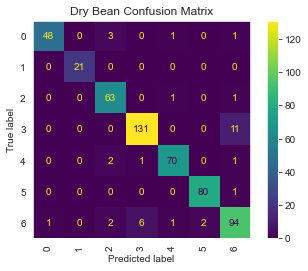

In [30]:
voting_model = VotingClassifier(estimators=[('xgb', model_xgb), ('lgb', model_lgb),('mlp', model_mlp),
                                            ('cb', model_cb)], voting='soft')

voting_model.fit(X_train, y_train)

print("F1_Score: ", metrics.f1_score(y_val, voting_model.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(voting_model, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

In [34]:
for clf in (model_svc, model_lgb, model_xgb, model_mlp, model_cb, voting_model):
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, metrics.f1_score(y_val, y_pred, average='micro'))

SVC 0.933579335793358
LGBMClassifier 0.940959409594096
XGBClassifier 0.9372693726937269
MLPClassifier 0.9391143911439115
CatBoostClassifier 0.940959409594096
VotingClassifier 0.9354243542435424


# Test

In [32]:
test_df = pd.read_csv('dataset/test_dry.csv')
X_test = test_df.drop(columns=['ID'])

X_test['Bounding_rectangular_area'] = X_test['Area']/X_test['Extent']


X_test_scaled = sc.transform(X_test[cols])
X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)


X_test = X_test.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                              'Perimeter','AspectRation'])

y_test_pred = voting_model.predict(X_test)

In [34]:
test_df['y'] = le.inverse_transform(y_test_pred)
#test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)